In [26]:
import numpy as np
from skfuzzy import control as ctrl

level = ctrl.Antecedent(np.arange(1.5, 9.0, 0.1), "level")
flow = ctrl.Antecedent(np.arange(0, 0.6, 0.01), "flow")
influx = ctrl.Consequent(np.arange(0, 0.6, 0.01), "influx")

c:\Users\user\Projects\python\fuzzy\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


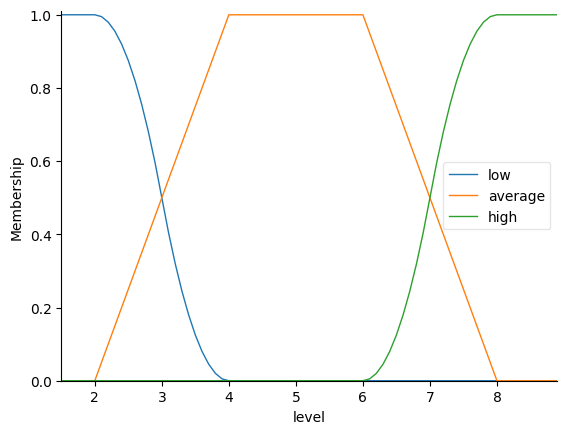

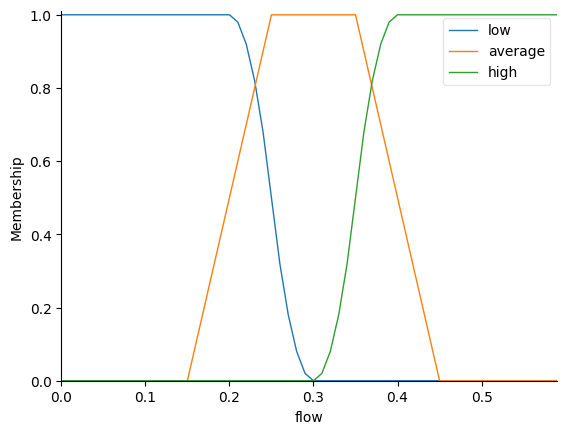

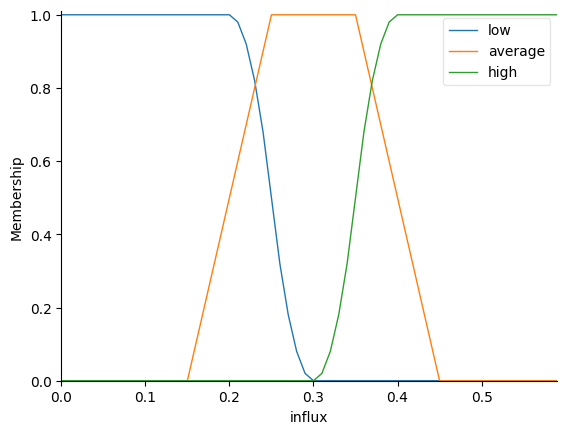

In [27]:
import skfuzzy as fuzz

level["low"] = fuzz.zmf(level.universe, 2, 4)
level["average"] = fuzz.trapmf(level.universe, [2, 4, 6, 8])
level["high"] = fuzz.smf(level.universe, 6, 8)
level.view()

flow["low"] = fuzz.zmf(flow.universe, 0.2, 0.3)
flow["average"] = fuzz.trapmf(flow.universe, [0.15, 0.25, 0.35, 0.45])
flow["high"] = fuzz.smf(flow.universe, 0.3, 0.4)
flow.view()

influx["low"] = fuzz.zmf(influx.universe, 0.2, 0.3)
influx["average"] = fuzz.trapmf(influx.universe, [0.15, 0.25, 0.35, 0.45])
influx["high"] = fuzz.smf(influx.universe, 0.3, 0.4)
influx.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

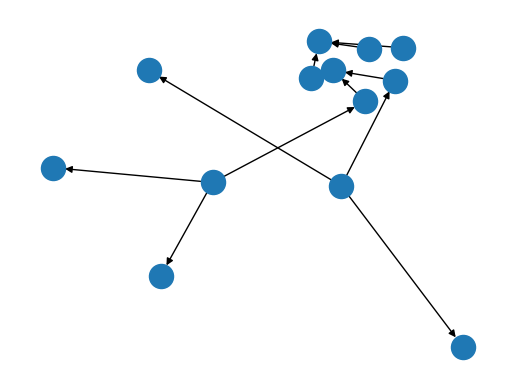

In [28]:
rule1 = ctrl.Rule(level["low"] & flow["high"], influx["high"])
rule2 = ctrl.Rule(level["low"] & flow["average"], influx["high"])
rule3 = ctrl.Rule(level["low"] & flow["low"], influx["average"])
rule4 = ctrl.Rule(level["average"] & flow["high"], influx["high"])
rule5 = ctrl.Rule(level["average"] & flow["average"], influx["average"])
rule6 = ctrl.Rule(level["average"] & flow["low"], influx["average"])
rule7 = ctrl.Rule(level["high"] & flow["high"], influx["average"])
rule8 = ctrl.Rule(level["high"] & flow["average"], influx["low"])
rule9 = ctrl.Rule(level["high"] & flow["low"], influx["low"])

rule1.view()

In [29]:
influx_ctrl = ctrl.ControlSystem(
    [
        rule1,
        rule2,
        rule3,
        rule4,
        rule5,
        rule6,
        rule7,
        rule8,
        rule9,
    ]
)

influxes = ctrl.ControlSystemSimulation(influx_ctrl)

In [32]:
influxes.input["level"] = 2.5
influxes.input["flow"] = 0.4
influxes.compute()
influxes.print_state()
influxes.output["influx"]

 Antecedents 
Antecedent: level                   = 2.5
  - low                             : 0.875
  - average                         : 0.25
  - high                            : 0.0
Antecedent: flow                    = 0.4
  - low                             : 0.0
  - average                         : 0.4999999999999997
  - high                            : 1.0

 Rules 
RULE #0:
  IF level[low] AND flow[high] THEN influx[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - level[low]                                             : 0.875
  - flow[high]                                             : 1.0
                                 level[low] AND flow[high] = 0.875
  Activation (THEN-clause):
                                              influx[high] : 0.875

RULE #1:
  IF level[low] AND flow[average] THEN influx[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - level[low]       

np.float64(0.4315251220586045)

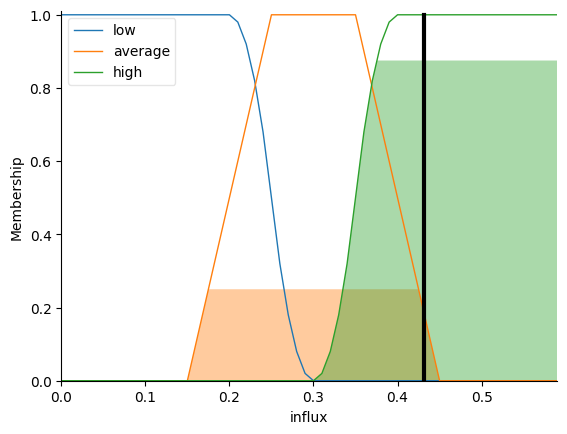

In [31]:
influx.view(sim=influxes)